# What is Linear Classification?

Imagine that you have two point clouds that you want to classify, what solution do you propose? The idea that logistic regression proposes is to separate them with a straight line.

### Exercise 

implement logistic regression

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Función  J
def j(y, p):
    return - (y * np.log(p) + (1 - y) * np.log(1 - p))
# Gradiente de la función
def gradient(X, y, p):
    return np.dot(X.T, (p - y))
# Calcular predicciones
def predict(X, w):
    return 1 / (1 + np.exp(-np.dot(X, w)))

In [9]:
# Generar datos
x = [4 + np.random.normal() for i in range(20)] + [2 + np.random.normal() for i in range(20)]
y = [4 + np.random.normal() for i in range(20)] + [2 + np.random.normal() for i in range(20)]
z = [1] * 20 + [0] * 20
data = pd.DataFrame({'x': x, 'y': y, 'Type': z})

In [10]:
# Agregar columna de sesgo
data['bias'] = 1

In [11]:
# Definir matriz de características X y vector de etiquetas y
X = data[['x', 'y', 'bias']].values
y = data['Type'].values

In [12]:
# Inicializar pesos
w = np.zeros(X.shape[1])

In [13]:
# Tasa de aprendizaje
learning_rate = 0.01

In [14]:
# Número de iteraciones
num_iterations = 1000

In [15]:
# Gradiente descendente
for i in range(num_iterations):
    # Calcular probabilidades
    p = predict(X, w)
    # Calcular el gradiente
    grad = gradient(X, y, p)
    # Actualizar pesos
    w -= learning_rate * grad

In [16]:
# Hacer predicciones con el modelo
predictions = predict(X, w)

In [17]:
# Imprimir pesos estimados
print("Pesos estimados:", w)

Pesos estimados: [ 1.46440633  1.85301819 -9.73906031]


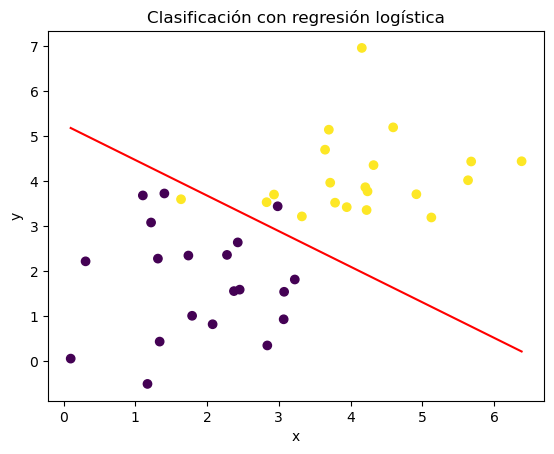

In [18]:
# Visualización opcional de los datos y la frontera de decisión
plt.scatter(data['x'], data['y'], c=data['Type'])
x_values = np.linspace(min(data['x']), max(data['x']), 100)
y_values = -(w[0]*x_values + w[2]) / w[1] 
plt.plot(x_values, y_values, color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Clasificación con regresión logística')
plt.show()

Con el archivo Aztlan.py

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
# Función de pérdida J
def j(y, p):
    p = np.clip(p, 1e-15, 1 - 1e-15)  # Corrección para evitar divisiones por cero y logaritmos de cero
    return - (y * np.log(p) + (1 - y) * np.log(1 - p))
# Gradiente de la función 
def gradient(X, y, p):
    return np.dot(X.T, (p - y.reshape(-1, 1)))
# Calcular predicciones
def predict(X, w):
    return 1 / (1 + np.exp(-np.dot(X, w)))

In [43]:
# Datos de entrada
x = [4 + np.random.normal() for i in range(20)] + [2 + np.random.normal() for i in range(20)]
y = [4 + np.random.normal() for i in range(20)] + [2 + np.random.normal() for i in range(20)]
z = [1] * 20 + [0] * 20
data = pd.DataFrame({'x': x, 'y': y, 'Type': z})

In [44]:
# Agregar columna de sesgo
data['bias'] = 1

In [45]:
# Matriz de características X y vector de etiquetas y
X = data[['x', 'y', 'bias']].values
y = data['Type'].values

In [46]:
# Función para la optimización
def loss_function(w):
    p = predict(X, w)
    return np.sum(j(y, p))
# Gradiente de la función para la optimización
def gradient_loss_function(w):
    p = predict(X, w)
    return gradient(X, y, p)
# Importar funciones de optimización de gradiente
def partial(func: "Function", vals: tuple, index, delta = 0.00001):
    vals = np.array(vals, dtype = "float")
    vals_delta = vals.copy()
    vals_delta[index] += delta
    return (func(vals_delta) - func(vals)) / delta
def grad(func: "Function", vals: tuple, delta = 0.0000001):
    grads = []
    for i in range(len(vals)):
        vals_delta = np.array(vals, dtype="float")
        vals_delta[i] += delta
        grad_i = (func(vals_delta) - func(vals)) / delta
        grads.append(grad_i)
    return np.array(grads)
def gradient_des(func: "Function", x0: tuple,
                 epsilon: float = 0.001,
                 max_iter: int = 10_000,
                 alpha: float = 0.3,
                 delta: float = 1e-7,
                 verbose: bool = False,
                 orbit: bool = False) -> np.ndarray:
    x0 = np.array(x0)
    x1 = x0 - alpha * grad(func, x0, delta = delta)
    if verbose:
        print(x0)
    points = [x0, x1]
    i = 1
    while np.linalg.norm(x1 - x0) > epsilon and i <= max_iter:
        x0 = x1
        x1 = x0 - alpha * grad(func, x0, delta = delta)
        points.append(x1)
        i += 1
    if verbose:
        print('Max Iter: {}'.format(i))
        print('Norm: {}'.format(np.linalg.norm(x1 - x0)))
    if orbit:
        return x1, points
    return x1

In [47]:
# Inicializar pesos
w0 = np.zeros(X.shape[1])

In [48]:
# Optimizar los pesos usando el gradiente descendente
optimized_weights = gradient_des(loss_function, w0)

In [49]:
# Imprimir los pesos optimizados
print("Pesos optimizados:", optimized_weights)

Pesos optimizados: [ -8.19540847 -16.09343356 -32.52516927]


In [50]:
# Hacer predicciones con el modelo
predictions = predict(X, optimized_weights)

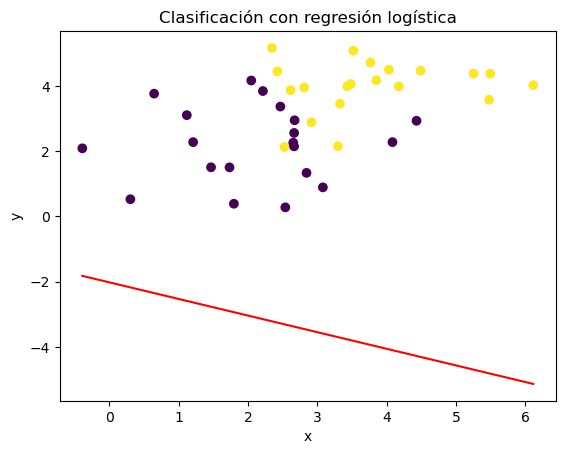

In [51]:
# Visualización opcional de los datos y la frontera de decisión
plt.scatter(data['x'], data['y'], c=data['Type'])
x_values = np.linspace(min(data['x']), max(data['x']), 100)
y_values = -(optimized_weights[0]*x_values + optimized_weights[2]) / optimized_weights[1]  # Frontera de decisión
plt.plot(x_values, y_values, color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Clasificación con regresión logística')
plt.show()

Con matriz de confusión usando archivo de Aztlan

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [99]:
# Función de pérdida J
def j(y, p):
    p = np.clip(p, 1e-15, 1 - 1e-15)  # Corrección para evitar divisiones por cero y logaritmos de cero
    return - (y * np.log(p) + (1 - y) * np.log(1 - p))

In [100]:
# Gradiente de la función
def gradient(X, y, p):
    return np.dot(X.T, (p - y.reshape(-1, 1)))

In [101]:
# Calcular predicciones
def predict(X, w):
    return 1 / (1 + np.exp(-np.dot(X, w)))

In [102]:
# Datos de entrada
x = [4 + np.random.normal() for i in range(20)] + [2 + np.random.normal() for i in range(20)]
y = [4 + np.random.normal() for i in range(20)] + [2 + np.random.normal() for i in range(20)]
z = [1] * 20 + [0] * 20
data = pd.DataFrame({'x': x, 'y': y, 'Type': z})

In [103]:
# Agregar columna de sesgo
data['bias'] = 1

In [104]:
# Matriz de características X y vector de etiquetas y
X = data[['x', 'y', 'bias']].values
y = data['Type'].values

In [105]:
# Función para la optimización
def loss_function(w):
    p = predict(X, w)
    return np.sum(j(y, p))
# Gradiente de la función para la optimización
def gradient_loss_function(w):
    p = predict(X, w)
    return gradient(X, y, p)
# Importar funciones de optimización de gradiente
def partial(func: "Function", vals: tuple, index, delta = 0.00001):
    vals = np.array(vals, dtype = "float")
    vals_delta = vals.copy()
    vals_delta[index] += delta
    return (func(vals_delta) - func(vals)) / delta
def grad(func: "Function", vals: tuple, delta = 0.0000001):
    grads = []
    for i in range(len(vals)):
        vals_delta = np.array(vals, dtype="float")
        vals_delta[i] += delta
        grad_i = (func(vals_delta) - func(vals)) / delta
        grads.append(grad_i)
    return np.array(grads)
def gradient_des(func: "Function", x0: tuple,
                 epsilon: float = 0.001,
                 max_iter: int = 10_000,
                 alpha: float = 0.3,
                 delta: float = 1e-7,
                 verbose: bool = False,
                 orbit: bool = False) -> np.ndarray:
    x0 = np.array(x0)
    x1 = x0 - alpha * grad(func, x0, delta = delta)
    if verbose:
        print(x0)
    points = [x0, x1]
    i = 1
    while np.linalg.norm(x1 - x0) > epsilon and i <= max_iter:
        x0 = x1
        x1 = x0 - alpha * grad(func, x0, delta = delta)
        points.append(x1)
        i += 1
    if verbose:
        print('Max Iter: {}'.format(i))
        print('Norm: {}'.format(np.linalg.norm(x1 - x0)))
    if orbit:
        return x1, points
    return x1

In [106]:
# Inicializar pesos
w0 = np.zeros(X.shape[1])

In [107]:
# Optimizar los pesos usando el gradiente descendente
optimized_weights = gradient_des(loss_function, w0)

In [108]:
# Imprimir los pesos optimizados
print("Pesos optimizados:", optimized_weights)

Pesos optimizados: [-6.78878205 -8.25804199 -8.95523405]


In [109]:
# Hacer predicciones con el modelo
predictions = predict(X, optimized_weights)

In [110]:
# Crear la matriz de confusión
binary_predictions = np.where(predictions >= 0.5, 1, 0)
conf_matrix = confusion_matrix(y, binary_predictions)

In [111]:
# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)

Matriz de Confusión:
[[20  0]
 [20  0]]


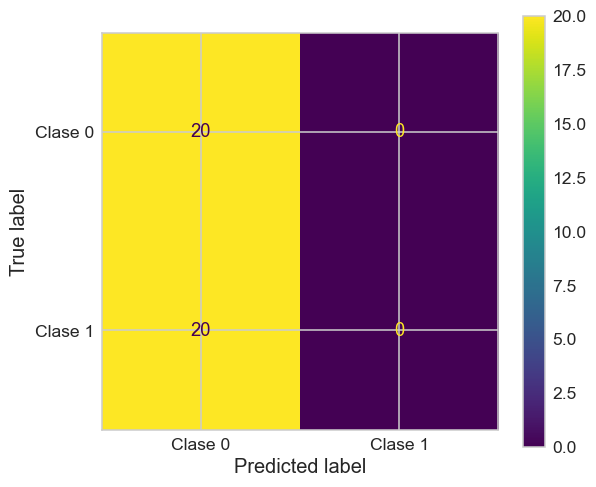

In [112]:
# Visualización de la matriz de confusión
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Clase 0', 'Clase 1'])
disp.plot()
plt.show()